### Exercise 01.1

1. $\langle r \rangle = \int_0^1 r dr = 1/2$.

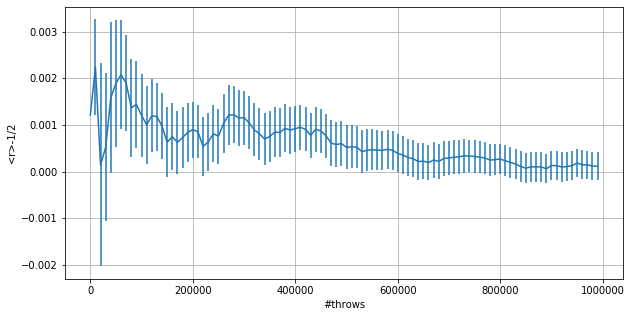

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000000             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

f, error = np.loadtxt("Es1_1/Data/int_1.out", usecols=(0,1), delimiter=' ', unpack='true')
ax.errorbar(x,f-0.5,yerr=error)

ax.set_xlabel('#throws')
ax.set_ylabel('<r>-1/2')
ax.grid(True)
plt.show()

La stima del valore dell'integrale sta convergendo al valore atteso.

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

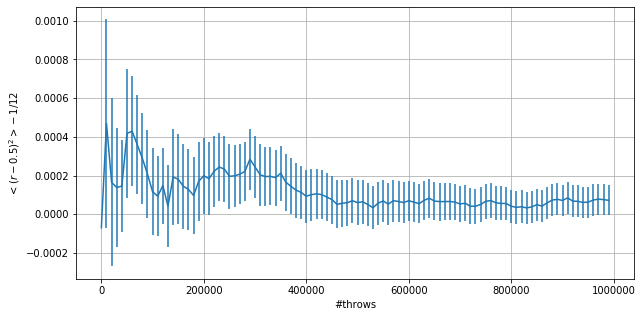

In [2]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

f, error = np.loadtxt("Es1_1/Data/int_2.out", usecols=(0,1), delimiter=' ', unpack='true')
plt.errorbar(x,f-1/12,yerr=error)

ax.set_xlabel('#throws')
ax.set_ylabel('$<(r-0.5)^2>-1/12$')
ax.grid(True)
plt.show()

La stima del valore dell'integrale sta convergendo al valore atteso.

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. 
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

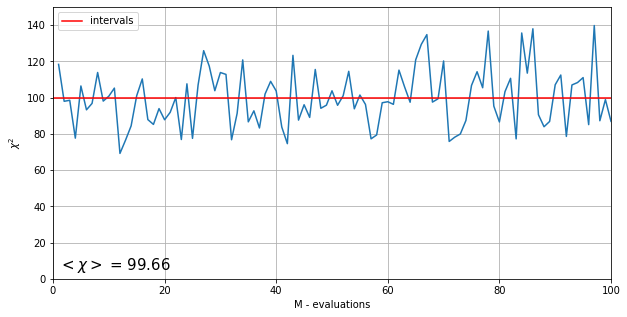

In [3]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

x, ki = np.loadtxt("Es1_1/Data/ki2.out", usecols=(0,1), delimiter=' ', unpack='true')
ax.plot(x,ki)
ax.plot((0,100),(100,100), c='r', label='intervals')

ax.set_xlabel('M - evaluations')
ax.set_ylabel('$\chi^2$')
ax.set_ylim(0,150)
ax.set_xlim(0,100)
ax.legend()
ax.grid(True)
ax.text(1,5,f'$<\chi>$ = {round(np.mean(ki),2)}', size=15)
plt.show()

Il valore medio $<\chi^2> \simeq 100$ in accordo con l'ipotesi di distribuzione uniforme.

### Exercise 01.2

### Uniform distibution

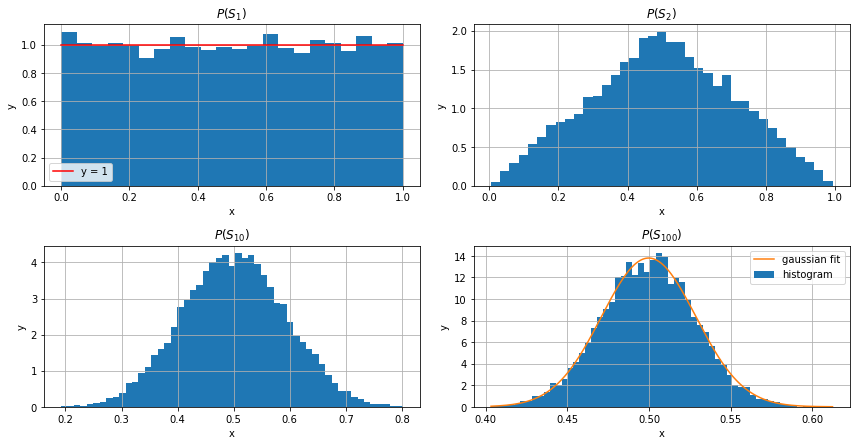

[ 0.49982517 13.80198801  0.04088827]


In [4]:
from scipy.optimize import curve_fit

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)

hh = np.loadtxt("Es1_2/Data/std1.out", usecols=(0), delimiter=' ', unpack='true')
ax.hist(hh, bins='auto', density=True)
ax.plot((0,1),(1,1), c='r', label = 'y = 1')
ax.set_title('$P(S_1)$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

hh = np.loadtxt("Es1_2/Data/std2.out", usecols=(0), delimiter=' ', unpack='true')
ax2.hist(hh, bins='auto', density=True)
ax2.set_title('$P(S_2)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)

hh = np.loadtxt("Es1_2/Data/std10.out", usecols=(0), delimiter=' ', unpack='true')
ax3.hist(hh, bins='auto', density=True)
ax3.set_title('$P(S_{10})$')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.grid(True)

hh = np.loadtxt("Es1_2/Data/std100.out", usecols=(0), delimiter=' ', unpack='true')
bin_heights, bin_borders, _ = ax4.hist(hh, bins='auto', density=True, label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='gaussian fit')
plt.legend()

ax4.set_title('$P(S_{100})$')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.grid(True)

plt.tight_layout()
plt.show()

print(popt)

All'aumentare di $N$ la $P(S_N)$ si avvicina all'attrattore Gaussiano, infatti il caso $P(S_{100})$ può essere fittato con una Gaussiana.

### Exponential

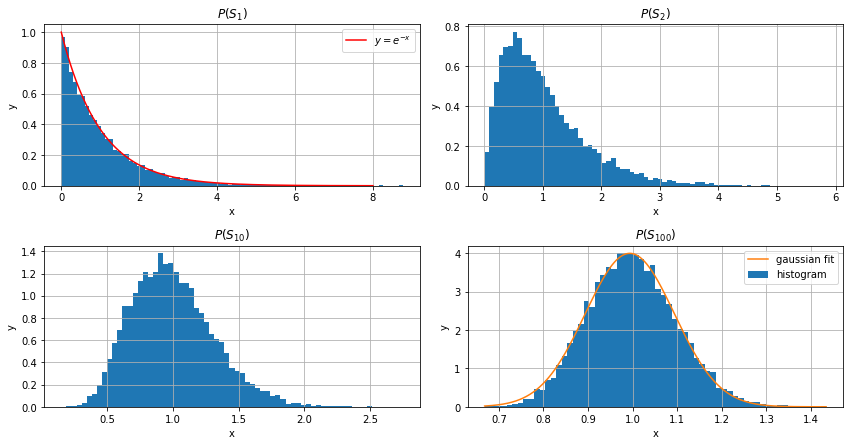

[ 0.99367817  3.99702825 -0.14134317]


In [5]:
from math import exp

def exponential(x,l):
    return l * exp(- l * x)
    
x = np.linspace(0, 8, 10000)
y = []
for i in range(len(x)):
    y.append(exponential(x[i],1))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)

hh = np.loadtxt("Es1_2/Data/exp1.out", usecols=(0), delimiter=' ', unpack='true')
ax.hist(hh, bins='auto', density=True)
ax.plot(x,y, c='r', label='$y = e^{-x}$')
ax.set_title('$P(S_1)$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

hh = np.loadtxt("Es1_2/Data/exp2.out", usecols=(0), delimiter=' ', unpack='true')
ax2.hist(hh, bins='auto', density=True)
ax2.set_title('$P(S_2)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)

hh = np.loadtxt("Es1_2/Data/exp10.out", usecols=(0), delimiter=' ', unpack='true')
ax3.hist(hh, bins='auto', density=True)
ax3.set_title('$P(S_{10})$')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.grid(True)

hh = np.loadtxt("Es1_2/Data/exp100.out", usecols=(0), delimiter=' ', unpack='true')
bin_heights, bin_borders, _ = ax4.hist(hh, bins='auto', density=True, label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='gaussian fit')
plt.legend()

ax4.set_title('$P(S_{100})$')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.grid(True)

plt.tight_layout()
plt.show()

print(popt)

Anche in questo caso all'aumentare di $N$ la $P(S_N)$ si avvicina all'attrattore Gaussiano, infatti il caso $P(S_{100})$ può essere fittato con una Gaussiana.

### Lorentzian

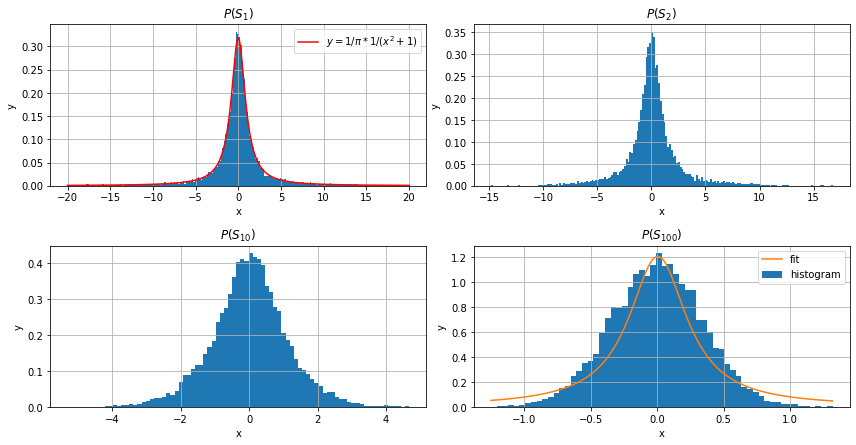

[0.26440031 0.00569238]


In [8]:
from math import pi
from scipy.optimize import curve_fit

def lorentzian(x, gamma, mean):
    return 1/pi * gamma/ ( (x-mean)**2 + gamma**2 )

x = np.linspace(-20, 20, 1000)
y = []
for i in range(len(x)):
    y.append(lorentzian(x[i],1,0))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)

hh = np.loadtxt("Es1_2/Data/lor1.out", usecols=(0), delimiter=' ', unpack='true')
ax.hist(hh, bins='auto', density=True)
ax.plot(x,y, c='r', label='$y = {1}/{\pi}*{1}/(x^2+1)$')
ax.set_title('$P(S_1)$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)


hh = np.loadtxt("Es1_2/Data/lor2.out", usecols=(0), delimiter=' ', unpack='true')
ax2.hist(hh, bins='auto', density=True)
ax2.set_title('$P(S_2)$')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True)

hh = np.loadtxt("Es1_2/Data/lor10.out", usecols=(0), delimiter=' ', unpack='true')
ax3.hist(hh, bins='auto', density=True)
ax3.set_title('$P(S_{10})$')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.grid(True)

hh = np.loadtxt("Es1_2/Data/lor100.out", usecols=(0), delimiter=' ', unpack='true')
bin_heights, bin_borders, _ = ax4.hist(hh, bins='auto', density=True, label='histogram')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(lorentzian, bin_centers, bin_heights, p0=[1., 0.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, lorentzian(x_interval_for_fit, *popt), label='fit')
plt.legend()

ax4.set_title('$P(S_{100})$')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.grid(True)


plt.tight_layout()
plt.show()

print(popt)

La distribuzione Cauchy-Lorentz è a varianza infinita quindi non rispetta le ipotesi del teorema del limite centrale. Il caso $P(S_{100})$ riesce ad essere fittato con una distribuzione Cauchy-Lorentz.

### Exercise 01.3

**Simulate** the Buffon’s experiment:
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

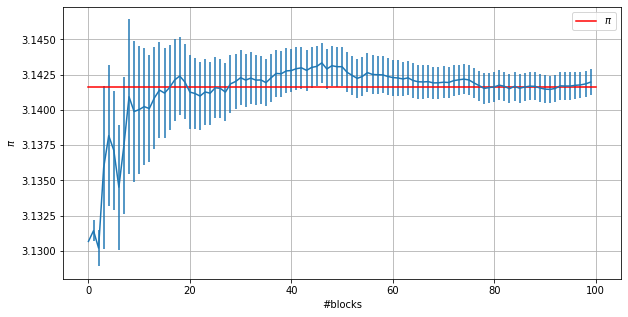

In [71]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

f, error = np.loadtxt("Es1_3/Data/pi.out", usecols=(0,1), delimiter=' ', unpack='true')
x = [*range(len(f))]
ax.errorbar(x,f,yerr=error)
ax.plot((0,100),(pi,pi), c='r', label='$\pi$');

ax.set_xlabel('#blocks')
ax.set_ylabel('$\pi$')
ax.grid(True)
ax.legend()
plt.show()

Nella simulazione, per non utilizzare $\pi$ nella stima di $\pi$, è stata applicata una tecnica di accept-reject su una coppia di numeri casuali $(x,y)$ generati in $[1,1]$. La coppia viene accettata se 'cade' all'interno del cerchio $x^2 + y^2 < 1$ e si calcola all'angolo di inclinazione della 'barra' di lunghezza $L$.
Il risultato ottenuto è in accordo con il valore di $\pi$.